In [1]:
from myfunc import stochastic, finfunc
import pandas as pd

In [2]:
#グラフ、桁数表記設定
from myfunc.utility import pref
pref()

<AxesSubplot:>

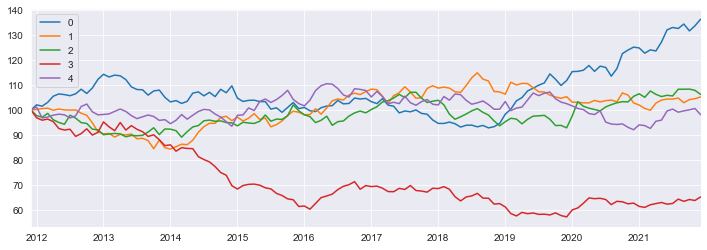

In [3]:
gbm = stochastic.geometric_brownian_motion(M=120, npath=5)
dates = pd.date_range(end='2021-12-31', periods=len(gbm), freq='BM')
df = pd.DataFrame(gbm, index=dates)
df.plot()

In [4]:
df.apply(lambda x:finfunc.hurst(x.dropna()))

0    0.254715
1    0.047743
2    0.074848
3    0.191888
4    0.054088
dtype: float64

(<Figure size 864x288 with 1 Axes>, <Figure size 864x288 with 1 Axes>)

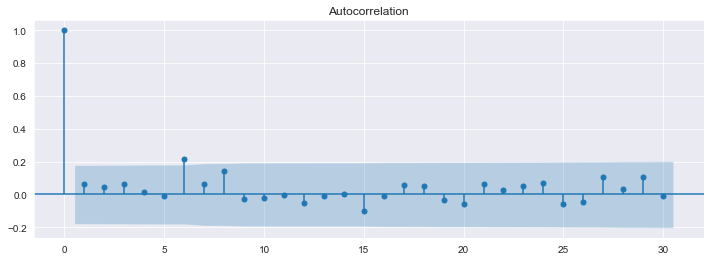

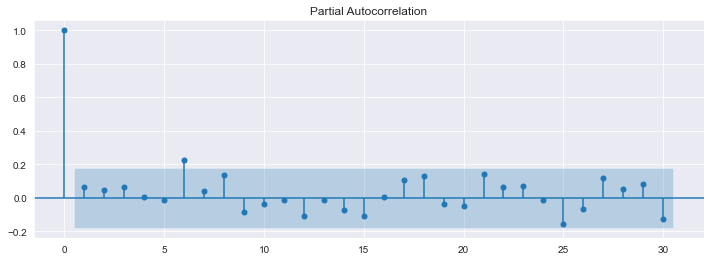

In [5]:
ts=df.iloc[:,0]
ts_r=ts.pct_change().dropna()
finfunc.acf_plot(ts_r)

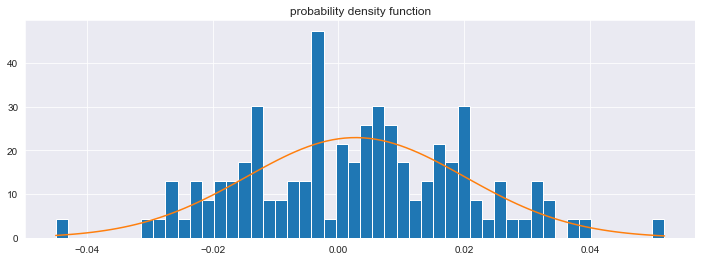

In [6]:
finfunc.histgram_pdf(ts_r)

<AxesSubplot:xlabel='freq/y'>

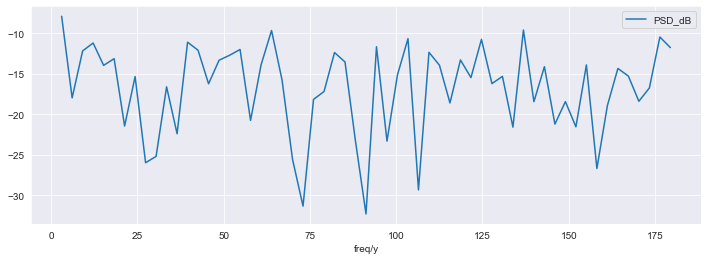

In [7]:
finfunc.fast_Fourier_transform_psd(ts_r.values).plot(legend=True)

<AxesSubplot:>

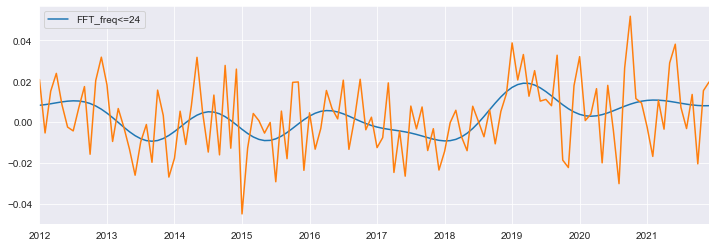

In [8]:
finfunc.fast_Fourier_transform(ts_r,freq_cut=24).plot(legend=True)
ts_r.plot()

<AxesSubplot:>

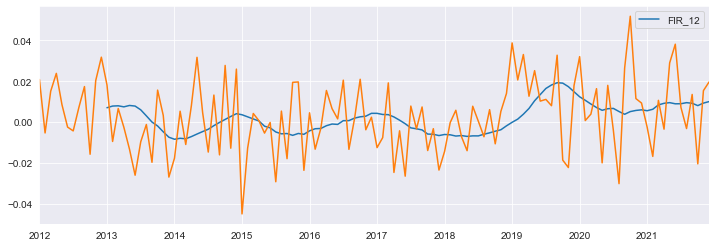

In [9]:
finfunc.filter_finite_impulse_response(ts_r,window=12).plot(legend=True)
ts_r.plot()

<AxesSubplot:>

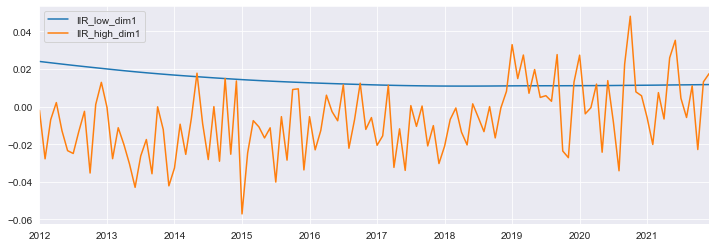

In [10]:
finfunc.filter_IIR_Butterworth(ts_r,dimension=1).plot()

In [11]:
import statsmodels.api as sm
SARIMA_fit = sm.tsa.SARIMAX(ts_r, order=(
    3, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
SARIMA_fit.summary()

/Users/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.90124D+00    |proj g|=  8.97872D-01

At iterate    5    f= -2.07301D+00    |proj g|=  2.30639D-01

At iterate   10    f= -2.14827D+00    |proj g|=  3.28876D-01

At iterate   15    f= -2.17641D+00    |proj g|=  1.87278D+00

At iterate   20    f= -2.18289D+00    |proj g|=  1.59563D-01

At iterate   25    f= -2.19280D+00    |proj g|=  3.44580D-01

At iterate   30    f= -2.19338D+00    |proj g|=  1.13377D-01

At iterate   35    f= -2.19362D+00    |proj g|=  1.31895D-01

At iterate   40    f= -2.19416D+00    |proj g|=  5.28879D-01

At iterate   45    f= -2.19535D+00    |proj g|=  9.97091D-01

At iterate   50    f= -2.19560D+00    |proj g|=  1.48968D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 263.472
Date:                              Sat, 19 Feb 2022   AIC                           -510.944
Time:                                      10:59:07   BIC                           -489.561
Sample:                                  01-31-2012   HQIC                          -502.276
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5979      1.219     -0.491      0.624      -2.986       1.790
ar.L2         -0.0086      0.141     -0.061      0.951      -0.285       0.267
ar.L3         -0.0645      0.116     -0.558      0.577      -0.291       0.162
ma.L1         -0.3112      1.210     -0.257      0.797      -2.682       2.060
ma.L2         -0.5652      1.137     -0.497      0.619      -2.793       1.662
ar.S.L12      -0.1587      0.152     -1.046      0.296      -0.456       0.139
ma.S.L12      -0.7771      0.171     -4.557      0.000      -1.111      -0.443
sigma2         0.0004   6.42e-05      5.651      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.74   Prob(JB):                         0.79
Heteroskedasticity (H):               1.31   Skew:                            -0.11
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

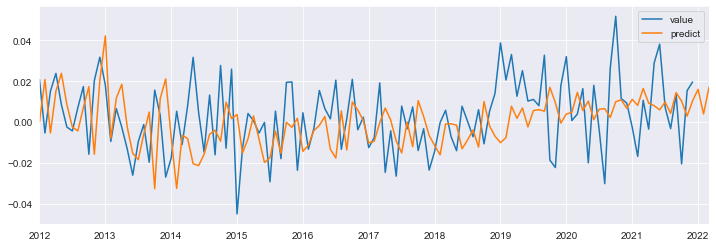

In [12]:
finfunc.statmodels_predict(SARIMA_fit, 3).plot()

<AxesSubplot:>

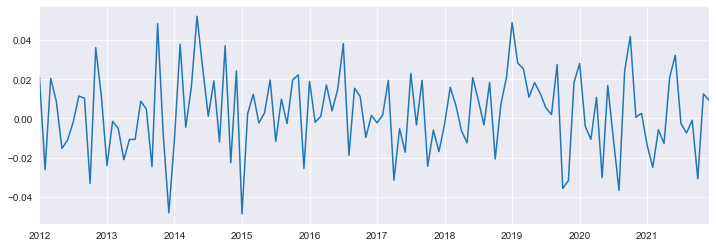

In [15]:
SARIMA_fit.resid.plot()

(<Figure size 864x288 with 1 Axes>, <Figure size 864x288 with 1 Axes>)

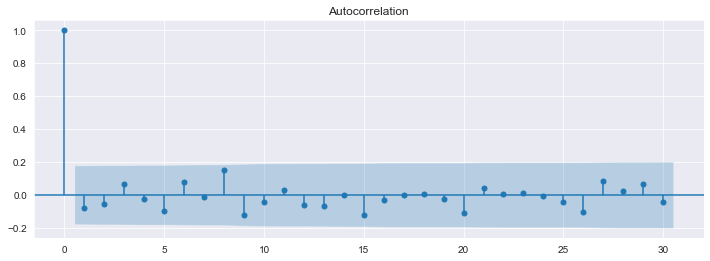

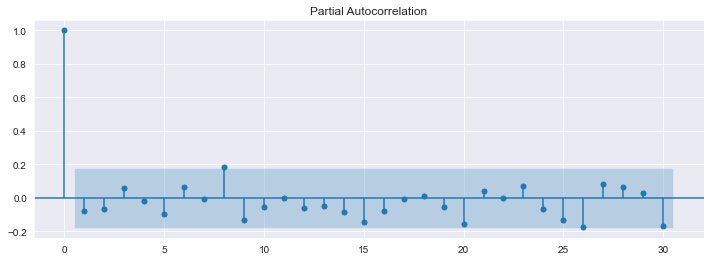

In [16]:
finfunc.acf_plot(SARIMA_fit.resid)